<a href="https://colab.research.google.com/github/ritikakhandelwal-17/Exploratory_Project-powertheftdetection/blob/main/check_corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
daily_data=pd.read_csv("/content/drive/MyDrive/daily_dataset.csv.gz")

In [ ]:
daily_data

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066
...,...,...,...,...,...,...,...,...,...
3510428,MAC004977,2014-02-24,0.0950,0.118458,0.580,48,0.093814,5.686,0.052
3510429,MAC004977,2014-02-25,0.0675,0.084208,0.176,48,0.037107,4.042,0.046
3510430,MAC004977,2014-02-26,0.1080,0.120500,0.282,48,0.069332,5.784,0.046
3510431,MAC004977,2014-02-27,0.0720,0.114062,0.431,48,0.094482,5.475,0.047


In [ ]:
mean_cons=daily_data.groupby('day')['energy_sum'].mean()
mean_cons

day
2011-11-23     6.952692
2011-11-24     8.536480
2011-11-25     9.499781
2011-11-26    10.267707
2011-11-27    10.850805
                ...    
2014-02-24    10.411403
2014-02-25    10.294997
2014-02-26    10.202945
2014-02-27    10.356350
2014-02-28     0.208997
Name: energy_sum, Length: 829, dtype: float64

In [ ]:
mean_cons=pd.DataFrame(mean_cons)
mean_cons

,energy_sum
day,
2011-11-23,6.952692
2011-11-24,8.536480
2011-11-25,9.499781
2011-11-26,10.267707
2011-11-27,10.850805
...,...
2014-02-24,10.411403
2014-02-25,10.294997
2014-02-26,10.202945


In [ ]:
mean_cons.reset_index(inplace=True)

mean_cons.columns=['date','mean energy']

In [ ]:
mean_cons['date']= (pd.to_datetime(mean_cons['date']).dt.strftime('%Y/%m/%d'))

In [ ]:
mean_cons

,date,mean energy
0,2011/11/23,6.952692
1,2011/11/24,8.536480
2,2011/11/25,9.499781
3,2011/11/26,10.267707
4,2011/11/27,10.850805
...,...,...
824,2014/02/24,10.411403
825,2014/02/25,10.294997
826,2014/02/26,10.202945
827,2014/02/27,10.356350


In [ ]:
weather=pd.read_csv('/content/drive/MyDrive/weather_daily_darksky.csv')

In [ ]:
weather['date']= (pd.to_datetime(weather['time']).dt.strftime('%Y/%m/%d'))


In [ ]:
weather.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,date
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00,10.87,11.96,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52,2011/11/11
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00,-0.64,5.72,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53,2011/12/11
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,rain,13.39,0.74,2011-12-27 14:00:00,5.52,10.33,0.0,2011-12-27 00:00:00,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10,2011/12/27
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,rain,11.89,0.87,2011-12-02 12:00:00,3.26,5.33,1.0,2011-12-02 00:00:00,2011-12-02 15:56:17,6.33,2.56,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25,2011/12/02
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,5.02,rain,13.16,0.80,2011-12-24 15:00:00,4.37,5.32,1.0,2011-12-24 00:00:00,2011-12-24 15:55:55,7.45,3.17,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99,2011/12/24


In [ ]:
dc=['temperatureMaxTime','temperatureMinTime','apparentTemperatureMinTime','apparentTemperatureHighTime','time'
,'sunriseTime','temperatureLow','temperatureHigh','apparentTemperatureMin','temperatureHighTime','uvIndexTime','sunsetTime','summary','apparentTemperatureLow','apparentTemperatureMax','apparentTemperatureHigh','temperatureLowTime','apparentTemperatureMaxTime','apparentTemperatureLowTime']
weather.drop(columns=dc,inplace=True)

In [ ]:
weather=weather.interpolate(method='linear', limit_direction='both')

In [ ]:
weather.isnull().sum()


temperatureMax    0
windBearing       0
icon              0
dewPoint          0
cloudCover        0
windSpeed         0
pressure          0
precipType        0
visibility        0
humidity          0
uvIndex           0
temperatureMin    0
moonPhase         0
date              0
dtype: int64

In [ ]:
weather

,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,precipType,visibility,humidity,uvIndex,temperatureMin,moonPhase,date
0,11.96,123,fog,9.40,0.79,3.88,1016.08,rain,3.30,0.95,1.0,8.85,0.52,2011/11/11
1,8.59,198,partly-cloudy-day,4.49,0.56,3.94,1007.71,rain,12.09,0.88,1.0,2.48,0.53,2011/12/11
2,10.33,225,partly-cloudy-day,5.47,0.85,3.54,1032.76,rain,13.39,0.74,0.0,8.03,0.10,2011/12/27
3,8.07,232,wind,3.69,0.32,3.00,1012.12,rain,11.89,0.87,1.0,2.56,0.25,2011/12/02
4,8.22,252,partly-cloudy-night,2.79,0.37,4.46,1028.17,rain,13.16,0.80,1.0,3.17,0.99,2011/12/24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,9.03,233,partly-cloudy-day,2.39,0.40,4.55,1002.10,rain,11.97,0.79,1.0,3.26,0.84,2014/01/26
878,10.31,224,partly-cloudy-day,3.08,0.32,4.14,1007.02,rain,12.04,0.74,2.0,3.93,0.93,2014/02/27
879,18.97,172,partly-cloudy-night,4.30,0.04,2.78,1022.44,rain,10.62,0.58,3.0,7.65,0.28,2014/03/09
880,8.83,210,wind,1.94,0.59,7.24,994.27,rain,11.80,0.75,1.0,3.03,0.42,2014/02/12


In [ ]:
gwe=weather.groupby('date').mean()
gwe

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureMin,moonPhase
date,,,,,,,,,,,
2011/11/01,15.570,208.0,10.13,0.360,2.45,1009.46,12.680,0.840,1.0,9.680,0.21
2011/11/02,15.190,134.0,10.23,0.390,4.39,1004.79,11.830,0.870,1.0,8.880,0.24
2011/11/03,17.410,154.0,13.39,0.520,3.99,993.40,12.150,0.890,1.0,12.790,0.27
2011/11/04,15.540,179.0,12.03,0.500,2.62,995.54,10.690,0.910,1.0,11.530,0.31
2011/11/05,13.940,346.0,10.96,0.650,2.70,1007.39,4.600,0.920,1.0,10.170,0.34
...,...,...,...,...,...,...,...,...,...,...,...
2014/03/26,8.480,1.0,1.70,0.460,2.49,1017.28,8.630,0.820,2.0,2.510,0.84
2014/03/27,10.040,75.0,2.08,0.440,2.36,1012.88,8.190,0.770,3.0,2.710,0.88
2014/03/28,12.430,87.0,3.67,0.190,3.31,1014.82,6.240,0.750,3.0,3.850,0.92


In [ ]:
gwe['temp_avg']=(gwe['temperatureMax']+gwe['temperatureMin'])/2

In [ ]:
mean_cons.set_index('date',inplace=True)
corrdf=mean_cons.merge(gwe,left_index=True,right_index=True)

In [ ]:
corrdf

,mean energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureMin,moonPhase,temp_avg
date,,,,,,,,,,,,,
2011/11/23,6.952692,10.36,229.0,6.29,0.36,2.04,1027.12,8.06,0.93,1.0,3.81,0.94,7.085
2011/11/24,8.536480,12.93,204.0,8.56,0.41,4.04,1027.22,10.64,0.89,1.0,8.56,0.97,10.745
2011/11/25,9.499781,13.03,243.0,7.24,0.48,5.02,1024.47,12.38,0.79,1.0,7.46,0.01,10.245
2011/11/26,10.267707,12.96,237.0,6.96,0.44,5.75,1025.80,13.07,0.81,1.0,7.01,0.05,9.985
2011/11/27,10.850805,13.54,256.0,5.76,0.42,5.48,1021.11,13.08,0.72,1.0,4.47,0.08,9.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014/02/24,10.411403,14.23,183.0,6.03,0.50,5.02,1005.19,13.00,0.74,1.0,7.99,0.82,11.110
2014/02/25,10.294997,11.43,202.0,5.06,0.62,5.69,1000.65,12.09,0.78,1.0,6.79,0.86,9.110
2014/02/26,10.202945,11.29,227.0,2.74,0.26,3.82,1012.73,13.00,0.73,2.0,4.17,0.90,7.730


In [ ]:
corrdf.dtypes

mean energy       float64
temperatureMax    float64
windBearing       float64
dewPoint          float64
cloudCover        float64
windSpeed         float64
pressure          float64
visibility        float64
humidity          float64
uvIndex           float64
temperatureMin    float64
moonPhase         float64
temp_avg          float64
dtype: object

In [ ]:
corr=corrdf.corr()


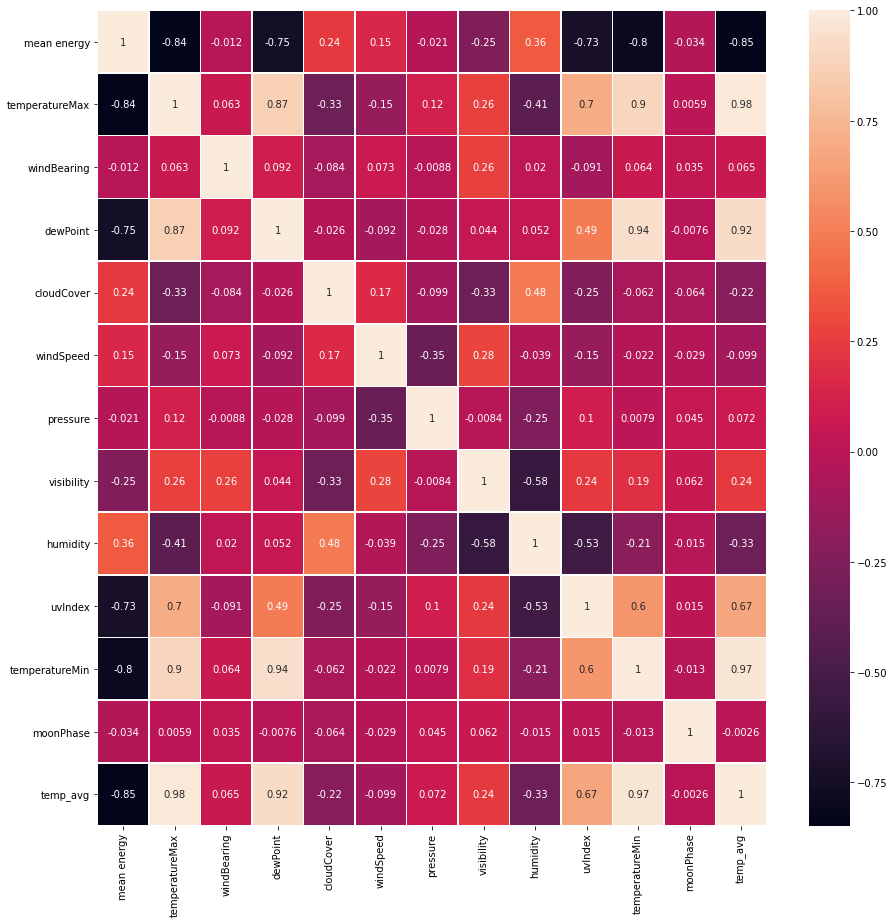

In [ ]:
#sns.heatmap(corr,annot=True,annot_kws={'size': 30})
#plt.show()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [ ]:
print(corr )

                mean energy  temperatureMax  ...  moonPhase  temp_avg
mean energy        1.000000       -0.843281  ...  -0.033909 -0.848009
temperatureMax    -0.843281        1.000000  ...   0.005851  0.979672
windBearing       -0.012487        0.062989  ...   0.035155  0.065113
dewPoint          -0.752965        0.865305  ...  -0.007638  0.921551
cloudCover         0.240359       -0.333366  ...  -0.064279 -0.219631
windSpeed          0.150135       -0.153939  ...  -0.028744 -0.098609
pressure          -0.020795        0.118874  ...   0.045468  0.071890
visibility        -0.245011        0.261507  ...   0.061707  0.237022
humidity           0.360975       -0.407601  ...  -0.015409 -0.327880
uvIndex           -0.728333        0.697686  ...   0.014791  0.672257
temperatureMin    -0.804079        0.896142  ...  -0.013204  0.966947
moonPhase         -0.033909        0.005851  ...   1.000000 -0.002607
temp_avg          -0.848009        0.979672  ...  -0.002607  1.000000

[13 rows x 13 colum

In [ ]:
corr=pd.DataFrame(corr)

In [ ]:
corr

,mean energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureMin,moonPhase,temp_avg
mean energy,1.000000,-0.843281,-0.012487,-0.752965,0.240359,0.150135,-0.020795,-0.245011,0.360975,-0.728333,-0.804079,-0.033909,-0.848009
temperatureMax,-0.843281,1.000000,0.062989,0.865305,-0.333366,-0.153939,0.118874,0.261507,-0.407601,0.697686,0.896142,0.005851,0.979672
windBearing,-0.012487,0.062989,1.000000,0.091572,-0.084089,0.073055,-0.008819,0.259289,0.020154,-0.090571,0.063978,0.035155,0.065113
dewPoint,-0.752965,0.865305,0.091572,1.000000,-0.025864,-0.091671,-0.027558,0.043610,0.052378,0.488401,0.938773,-0.007638,0.921551
cloudCover,0.240359,-0.333366,-0.084089,-0.025864,1.000000,0.169099,-0.098706,-0.332884,0.480499,-0.248808,-0.062135,-0.064279,-0.219631
windSpeed,0.150135,-0.153939,0.073055,-0.091671,0.169099,1.000000,-0.347084,0.278449,-0.039496,-0.154428,-0.022475,-0.028744,-0.098609
pressure,-0.020795,0.118874,-0.008819,-0.027558,-0.098706,-0.347084,1.000000,-0.008434,-0.252312,0.102189,0.007938,0.045468,0.071890
visibility,-0.245011,0.261507,0.259289,0.043610,-0.332884,0.278449,-0.008434,1.000000,-0.579505,0.241357,0.191942,0.061707,0.237022
humidity,0.360975,-0.407601,0.020154,0.052378,0.480499,-0.039496,-0.252312,-0.579505,1.000000,-0.534601,-0.207242,-0.015409,-0.327880
uvIndex,-0.728333,0.697686,-0.090571,0.488401,-0.248808,-0.154428,0.102189,0.241357,-0.534601,1.000000,0.600347,0.014791,0.672257


The correlation between max temp and avg temp0.979672303517869


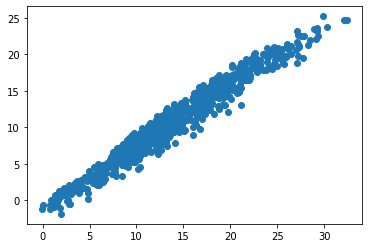

In [ ]:
plt.scatter(corrdf['temperatureMax'],corrdf['temp_avg'])

print('The correlation between max temp and avg temp'+str(corr['temperatureMax']['temp_avg']))

The correlation between min temp and avg temp0.9669473640676419


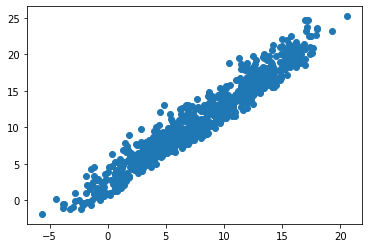

In [ ]:
plt.scatter(corrdf['temperatureMin'],corrdf['temp_avg'])

print('The correlation between min temp and avg temp'+str(corr['temperatureMin']['temp_avg']))

The correlation between dew point and avg temp0.921551395260892


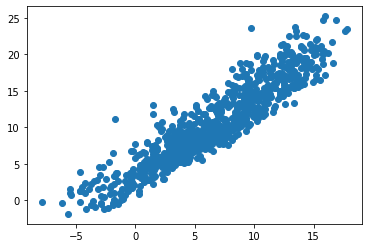

In [ ]:
plt.scatter(corrdf['dewPoint'],corrdf['temp_avg'])

print('The correlation between dew point and avg temp'+str(corr['dewPoint']['temp_avg']))

The correlation between uv index and mean energy-0.7283332270121659


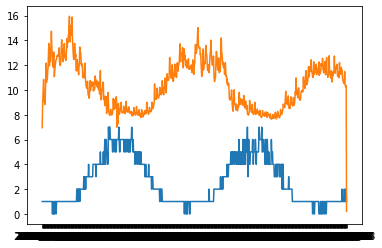

In [ ]:
plt.plot(corrdf['uvIndex'])
plt.plot(corrdf['mean energy'])
print('The correlation between uv index and mean energy'+str(corr['uvIndex']['mean energy']))

The correlation between avg temp and mean energy-0.8480088075320648


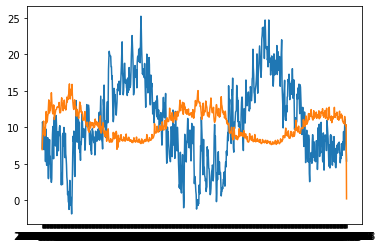

In [ ]:
plt.plot(corrdf['temp_avg'])
plt.plot(corrdf['mean energy'])
print('The correlation between avg temp and mean energy'+str(corr['temp_avg']['mean energy']))

In [ ]:
#other features 


In [ ]:
corrdf.reset_index(inplace=True)

In [ ]:
corrdf

In [ ]:
weat_feature=pd.DataFrame(columns=['date','temp_avg','uvIndex'])


In [ ]:
weat_feature['date']=corrdf['date']
weat_feature['temp_avg']=corrdf['temp_avg']
weat_feature['uvIndex']=corrdf['uvIndex']


In [ ]:
weat_feature

,date,temp_avg,uvIndex
0,2011/11/23,7.085,1.0
1,2011/11/24,10.745,1.0
2,2011/11/25,10.245,1.0
3,2011/11/26,9.985,1.0
4,2011/11/27,9.005,1.0
...,...,...,...
822,2014/02/24,11.110,1.0
823,2014/02/25,9.110,1.0
824,2014/02/26,7.730,2.0
825,2014/02/27,7.120,2.0


In [ ]:
weat_feature.to_csv( "/content/drive/MyDrive/weather_feature_selection.csv", index=False, encoding='utf-8-sig')